9.1 & 9.2

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/introToFADS/week9"

Mounted at /content/drive
/content/drive/MyDrive/introToFADS/week9


In [3]:
import pandas as pd
import numpy as np
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
package_name = "psych"
try:
    pkg = importr(package_name)
except:
    ro.r(f'install.packages("{package_name}")')
    pkg = importr(package_name)
pkg
import rpy2.robjects as ro
package_name = "lme4"
try:
    pkg = importr(package_name)
except:
    ro.r(f'install.packages("{package_name}")')
    pkg = importr(package_name)
pkg
import matplotlib.pyplot as plt

In [4]:
cci_Table = pd.DataFrame(columns=["convofreq", "convodur", "callinfreq", "callindur", "calloutfreq", "calloutdur", "textinfreq", "textinlen", "textoutfreq", "textoutlen", "appmessgfreq", "appmessgdur", "appsocialfreq", "appsocialdur"], index=["S1BPV", "S1IMR", "S2BPV", "S2IMR", "S3BPV", "S3IMR", "S4BPV", "S4IMR"])
# SAMPLE 1
data_list_1 =["Sample 1/S1 convo_frequency_long.csv", "Sample 1/S1 convo_duration_long.csv"]
# SAMPLE 2
data_list_2 =["Sample 2/S2 calls_in_frequency_long.csv", "Sample 2/S2 calls_in_length_long.csv", "Sample 2/S2 calls_out_frequency_long.csv", "Sample 2/S2 calls_out_length_long.csv", "Sample 2/S2 sms_in_frequency_long.csv", "Sample 2/S2 sms_in_length_long.csv", "Sample 2/S2 sms_out_frequency_long.csv", "Sample 2/S2 sms_out_length_long.csv"]
# SAMPLE 3
data_list_3 =["Sample 3/S3 calls_in_frequency_long.csv", "Sample 3/S3 calls_in_duration_long.csv", "Sample 3/S3 calls_out_frequency_long.csv", "Sample 3/S3 calls_out_duration_long.csv", "Sample 3/S3 sms_in_frequency_long.csv", "Sample 3/S3 sms_in_length_long.csv",  "Sample 3/S3 sms_out_frequency_long.csv", "Sample 3/S3 sms_out_length_long.csv", "Sample 3/S3 app_messaging_frequency_long.csv", "Sample 3/S3 app_messaging_duration_long.csv", "Sample 3/S3 app_social_frequency_long.csv", "Sample 3/S3 app_social_duration_long.csv"]
# SAMPLE 4
data_list_4 =["Sample 4/S4 convo_frequency_long.csv", "Sample 4/S4 convo_duration_long.csv", "Sample 4/S4 calls_in_frequency_long.csv", "Sample 4/S4 calls_in_duration_long.csv", "Sample 4/S4 calls_out_frequency_long.csv", "Sample 4/S4 calls_out_duration_long.csv", "Sample 4/S4 sms_in_frequency_long.csv", "Sample 4/S4 sms_in_length_long.csv",  "Sample 4/S4 sms_out_frequency_long.csv", "Sample 4/S4 sms_out_length_long.csv"]

In [6]:
import rpy2
from rpy2.robjects import FloatVector, pandas2ri
from rpy2.robjects.packages import importr
psych = importr("psych")
print("Sample 1")
for i in range(len(data_list_1)):
    data = pd.read_csv(data_list_1[i])
    data["n"] = data.groupby("userid")["userid"].transform("count")
    data_subset = data.loc[data["n"] > 1, ["userid", "date", "sums_24hours"]]
    data_subset["date"] = data_subset["date"].astype('category')
    data_subset_wide = data_subset.pivot(index="userid",columns="date",values="sums_24hours")
    values = rpy2.robjects.r.matrix(
    FloatVector(
        [item for sublist in data_subset_wide.values.tolist() for item in sublist]
        ),
        ncol=data_subset_wide.values.shape[1], byrow=True
        )
    icc = psych.ICC(values, missing = False)
    # Convert to Pandas DataFrame
    icc_df = pandas2ri.rpy2py(icc[0])
    cci_Table.iloc[0,i] = [round(icc_df.iloc[0,1], ndigits=2), round(icc_df.iloc[0, 6], ndigits=2), round(icc_df.iloc[0, 7], ndigits=2)]
    cci_Table.iloc[1,i] = [round(icc_df.iloc[5,1], ndigits=2), round(icc_df.iloc[5, 6], ndigits=2), round(icc_df.iloc[5, 7], ndigits=2)]
print("Sample 2")
for i in range(len(data_list_2)):
    data = pd.read_csv(data_list_2[i])
    data["n"] = data.groupby("userid")["userid"].transform("count")
    data_subset = data.loc[data["n"] > 1, ["userid", "date", "sums_24hours"]]
    data_subset["date"] = data_subset["date"].astype('category')
    data_subset_wide = data_subset.pivot(index="userid",columns="date",values="sums_24hours")
    values = rpy2.robjects.r.matrix(
    FloatVector(
        [item for sublist in data_subset_wide.values.tolist() for item in sublist]
        ),
        ncol=data_subset_wide.values.shape[1], byrow=True
        )
    icc = psych.ICC(values, missing = False)
    # Convert to Pandas DataFrame
    icc_df = pandas2ri.rpy2py(icc[0])
    cci_Table.iloc[2,i+2] = [round(icc_df.iloc[0,1], ndigits=2), round(icc_df.iloc[0, 6], ndigits=2), round(icc_df.iloc[0, 7], ndigits=2)]
    cci_Table.iloc[3,i+2] = [round(icc_df.iloc[5,1], ndigits=2), round(icc_df.iloc[5, 6], ndigits=2), round(icc_df.iloc[5, 7], ndigits=2)]
print("Sample 3")
for i in range(len(data_list_3)):
    data = pd.read_csv(data_list_3[i])
    data["n"] = data.groupby("userid")["userid"].transform("count")
    data_subset = data.loc[data["n"] > 1, ["userid", "date", "sums_24hours"]]
    data_subset["date"] = data_subset["date"].astype('category')
    data_subset_wide = data_subset.pivot(index="userid",columns="date",values="sums_24hours")
    values = rpy2.robjects.r.matrix(
    FloatVector(
        [item for sublist in data_subset_wide.values.tolist() for item in sublist]
        ),
        ncol=data_subset_wide.values.shape[1], byrow=True
        )
    icc = psych.ICC(values, missing = False)
    # Convert to Pandas DataFrame
    icc_df = pandas2ri.rpy2py(icc[0])
    cci_Table.iloc[4,i+2] = [round(icc_df.iloc[0,1], ndigits=2), round(icc_df.iloc[0, 6], ndigits=2), round(icc_df.iloc[0, 7], ndigits=2)]
    cci_Table.iloc[5,i+2] = [round(icc_df.iloc[5,1], ndigits=2), round(icc_df.iloc[5, 6], ndigits=2), round(icc_df.iloc[5, 7], ndigits=2)]
print("Sample 4")
for i in range(len(data_list_4)):
    data = pd.read_csv(data_list_4[i]) # read in file i
    data["n"] = data.groupby("userid")["userid"].transform("count")
    data_subset = data.loc[data["n"] > 1, ["userid", "date", "sums_24hours"]]
    data_subset["date"] = data_subset["date"].astype('category')
    data_subset_wide = data_subset.pivot(index="userid",columns="date",values="sums_24hours")
    values = rpy2.robjects.r.matrix(
    FloatVector(
        [item for sublist in data_subset_wide.values.tolist() for item in sublist]
        ),
        ncol=data_subset_wide.values.shape[1], byrow=True
        )
    icc = psych.ICC(values, missing = False)
    # Convert to Pandas DataFrame
    icc_df = pandas2ri.rpy2py(icc[0])
    cci_Table.iloc[6,i] = [round(icc_df.iloc[0,1], ndigits=2), round(icc_df.iloc[0, 6], ndigits=2), round(icc_df.iloc[0, 7], ndigits=2)]
    cci_Table.iloc[7,i] = [round(icc_df.iloc[5,1], ndigits=2), round(icc_df.iloc[5, 6], ndigits=2), round(icc_df.iloc[5, 7], ndigits=2)]
cci_Table

Sample 1
Sample 2


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Sample 3


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



Sample 4


,convofreq,convodur,callinfreq,callindur,calloutfreq,calloutdur,textinfreq,textinlen,textoutfreq,textoutlen,appmessgfreq,appmessgdur,appsocialfreq,appsocialdur
S1BPV,"[0.3, 0.24, 0.39]","[0.35, 0.28, 0.44]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1IMR,"[0.97, 0.95, 0.98]","[0.97, 0.96, 0.98]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S2BPV,NaN,NaN,"[0.11, 0.06, 0.21]","[0.11, 0.05, 0.2]","[0.2, 0.12, 0.32]","[0.15, 0.08, 0.26]","[0.39, 0.28, 0.54]","[0.3, 0.2, 0.44]","[0.35, 0.25, 0.5]","[0.33, 0.23, 0.48]",NaN,NaN,NaN,NaN
S2IMR,NaN,NaN,"[0.68, 0.5, 0.82]","[0.67, 0.49, 0.81]","[0.81, 0.7, 0.89]","[0.75, 0.62, 0.86]","[0.92, 0.87, 0.95]","[0.88, 0.81, 0.93]","[0.9, 0.85, 0.95]","[0.9, 0.84, 0.94]",NaN,NaN,NaN,NaN
S3BPV,NaN,NaN,"[0.16, 0.13, 0.21]","[0.2, 0.16, 0.25]","[0.33, 0.28, 0.38]","[0.37, 0.33, 0.43]","[0.17, 0.14, 0.21]","[0.11, 0.09, 0.14]","[0.19, 0.16, 0.23]","[0.14, 0.11, 0.18]","[0.7, 0.66, 0.75]","[0.51, 0.46, 0.56]","[0.67, 0.61, 0.72]","[0.62, 0.57, 0.67]"
S3IMR,NaN,NaN,"[0.85, 0.82, 0.89]","[0.88, 0.85, 0.91]","[0.94, 0.92, 0.95]","[0.95, 0.94, 0.96]","[0.87, 0.84, 0.89]","[0.8, 0.75, 0.84]","[0.88, 0.85, 0.9]","[0.83, 0.8, 0.87]","[0.99, 0.98, 0.99]","[0.97, 0.96, 0.97]","[0.98, 0.98, 0.99]","[0.98, 0.98, 0.98]"
S4BPV,"[0.55, 0.52, 0.57]","[0.52, 0.5, 0.55]","[0.3, 0.26, 0.34]","[0.42, 0.38, 0.47]","[0.32, 0.28, 0.37]","[0.26, 0.22, 0.31]","[0.52, 0.47, 0.57]","[0.43, 0.38, 0.48]","[0.57, 0.52, 0.62]","[0.45, 0.41, 0.51]",NaN,NaN,NaN,NaN
S4IMR,"[0.97, 0.97, 0.97]","[0.97, 0.96, 0.97]","[0.92, 0.9, 0.93]","[0.95, 0.94, 0.96]","[0.93, 0.91, 0.94]","[0.9, 0.88, 0.92]","[0.97, 0.96, 0.97]","[0.96, 0.95, 0.96]","[0.97, 0.97, 0.98]","[0.96, 0.95, 0.97]",NaN,NaN,NaN,NaN


Time Series for Sample 4

Before making time as index: nan values in data:  0
After making time as index: nan values in data:  152


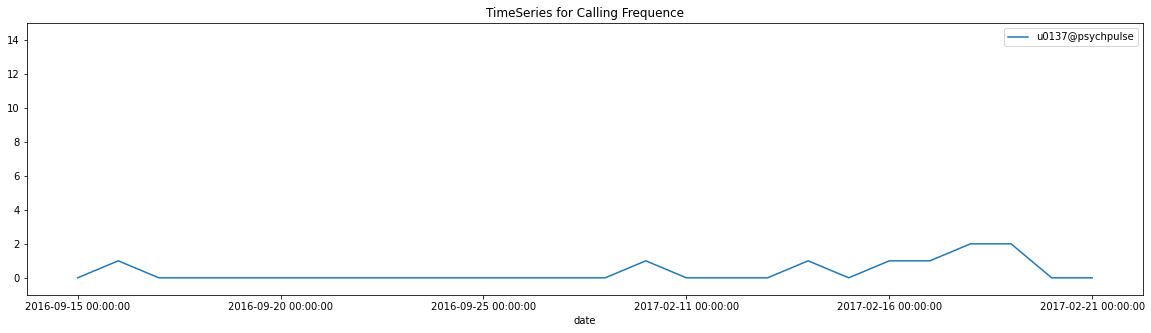

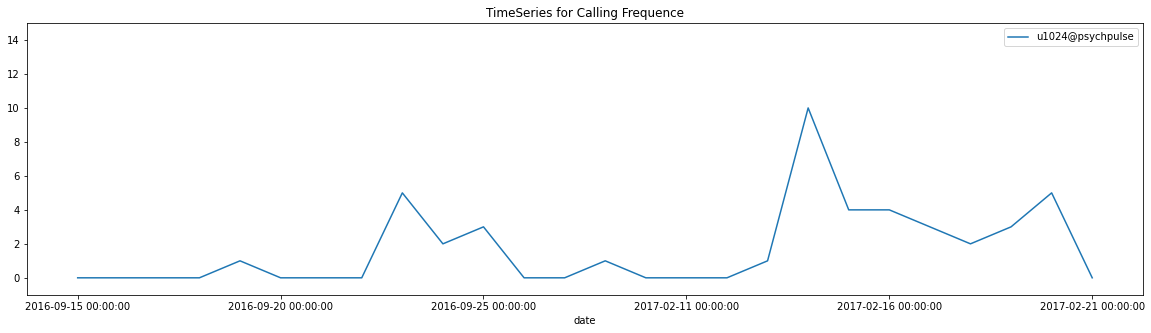

In [14]:
from datetime import datetime
data = pd.read_csv(data_list_4[2])

# data preprocessing
data["n"] = data.groupby("userid")["userid"].transform("count")
data['date'] = [datetime.strptime(str(x), '%Y%m%d') for x in data['date'].values.tolist()]
data_subset = data.loc[data["n"] > 1, ["userid", "date", "sums_24hours"]]
data_subset["date"] = data_subset["date"].astype('category')
print("Before making time as index: nan values in data: ", data_subset.isna().any().sum())
data_subset_wide = data_subset.pivot(index="userid",columns="date",values="sums_24hours").T
print("After making time as index: nan values in data: ", data_subset_wide.isna().any().sum())

# Imputation: replace nan with last known value
data_subset_wide = ((data_subset_wide.T).fillna(method='ffill'))
# drop remaining nans at the beginning where no last known value is given
data_subset_wide.dropna(inplace=True)
data_subset_wide = data_subset_wide.T

# Plot timeseries
data_subset_wide['mean'] = data_subset_wide.mean(axis=1)
data_subset_wide['var'] = data_subset_wide.var(axis=1)
plt.figure(figsize=(20,5))
ax = plt.gca()
#data_subset_wide.plot(kind='line',y='mean',ax=ax)
#data_subset_wide.plot(kind='line',y='var', color='red', ax=ax)
data_subset_wide.plot(kind='line',y=data_subset_wide.columns[10], ax=ax)
plt.ylim(-1, 15)
plt.title("TimeSeries for Calling Frequence")
plt.show()
plt.figure(figsize=(20,5))
ax = plt.gca()
data_subset_wide.plot(kind='line',y=data_subset_wide.columns[145], ax=ax)
plt.ylim(-1, 15)
plt.title("TimeSeries for Calling Frequence")
plt.show()

9.3

In [ ]:
table7 = pd.DataFrame(columns=["extra.r", "extra.ci", "extra.p", "agr.r", "agr.ci", "agr.p", "con.r", "con.ci", "con.p", "neur.r", "neur.ci", "neur.p", "ope.r", "ope.ci", "ope.p"], index=["morning callinfreq", "afternoon callinfreq", "evening callinfreq", "night callinfreq", "weekday callinfreq", "weekend callinfreq", "morning callindur", "afternoon callindur", "evening callindur", "night callindur", "weekday callindur", "weekend callindur", "morning calloutfreq", "afternoon calloutfreq", "evening calloutfreq", "night calloutfreq", "weekday calloutfreq", "weekend calloutfreq", "morning calloutdur", "afternoon calloutdur", "evening calloutdur", "night calloutdur", "weekday calloutdur", "weekend calloutdur", "morning textinfreq", "afternoon textinfreq", "evening textinfreq", "night textinfreq", "weekday textinfreq", "weekend textinfreq", "morning textinlen", "afternoon textinlen", "evening textinlen", "night textinlen", "weekday textinlen", "weekend textinlen", "morning textoutfreq", "afternoon textoutfreq", "evening textoutfreq", "night textoutfreq", "weekday textoutfreq", "weekend textoutfreq", "morning textoutlen", "afternoon textoutlen", "evening textoutlen", "night textoutlen", "weekday textoutlen", "weekend textoutlen", "morning appmessgfreq", "afternoon appmessgfreq", "evening appmessgfreq", "night appmessgfreq", "weekday appmessgfreq", "weekend appmessgfreq", "morning appmessgdur", "afternoon appmessgdur", "evening appmessgdur", "night appmessgdur", "weekday appmessgdur", "weekend appmessgdur", "morning appsocialfreq", "afternoon appsocialfreq", "evening appsocialfreq", "night appsocialfreq", "weekday appsocialfreq", "weekend appsocialfreq", "morning appsocialdur", "afternoon appsocialdur", "evening appsocialdur", "night appsocialdur", "weekday appsocialdur", "weekend appsocialdur"])
#table7

In [ ]:
DF_subset = pd.read_csv("Sample 3/S3 social_behaviors_wide.csv")
DF_subset.drop(['Unnamed: 0', 'userid'], axis=1)

,call_out_num_avg_daily,call_out_dur_avg_daily,call_out_num_avg_afternoon,call_out_dur_avg_afternoon,call_out_num_avg_evening,call_out_dur_avg_evening,call_out_num_avg_morning,call_out_dur_avg_morning,call_out_num_avg_night,call_out_dur_avg_night,call_in_num_avg_daily,call_in_dur_avg_daily,call_in_num_avg_afternoon,call_in_dur_avg_afternoon,call_in_num_avg_evening,call_in_dur_avg_evening,call_in_num_avg_morning,call_in_dur_avg_morning,call_in_num_avg_night,call_in_dur_avg_night,sms_in_num_avg_daily,sms_out_num_avg_daily,sms_in_len_avg_daily,sms_out_len_avg_daily,app_messaging_num_avg_daily,app_social_num_avg_daily,app_messaging_dur_avg_daily,app_messaging_durRob_avg_daily,app_social_dur_avg_daily,app_social_durRob_avg_daily,sms_in_num_avg_afternoon,sms_out_num_avg_afternoon,sms_in_len_avg_afternoon,sms_out_len_avg_afternoon,app_messaging_num_avg_afternoon,app_social_num_avg_afternoon,app_messaging_dur_avg_afternoon,app_messaging_durRob_avg_afternoon,app_social_dur_avg_afternoon,app_social_durRob_avg_afternoon,...,app_social_num_avg_friday,app_messaging_dur_avg_friday,app_messaging_durRob_avg_friday,app_social_dur_avg_friday,app_social_durRob_avg_friday,call_out_num_avg_saturday,call_out_dur_avg_saturday,call_in_num_avg_saturday,call_in_dur_avg_saturday,sms_in_num_avg_saturday,sms_out_num_avg_saturday,sms_in_len_avg_saturday,sms_out_len_avg_saturday,app_messaging_num_avg_saturday,app_social_num_avg_saturday,app_messaging_dur_avg_saturday,app_messaging_durRob_avg_saturday,app_social_dur_avg_saturday,app_social_durRob_avg_saturday,call_out_num_avg_sunday,call_out_dur_avg_sunday,call_in_num_avg_sunday,call_in_dur_avg_sunday,sms_in_num_avg_sunday,sms_out_num_avg_sunday,sms_in_len_avg_sunday,sms_out_len_avg_sunday,app_messaging_num_avg_sunday,app_social_num_avg_sunday,app_messaging_dur_avg_sunday,app_messaging_durRob_avg_sunday,app_social_dur_avg_sunday,app_social_durRob_avg_sunday,demog_age,demog_sex,BFSI_O,BFSI_C,BFSI_E,BFSI_A,BFSI_N
0,0.666667,106.370370,0.200000,12.718519,0.366667,91.037037,0.166667,13.251852,0.000000,0.0,0.266667,24.966667,0.066667,3.533333,0.166667,18.900000,0.033333,2.533333,0.000000,0.000000,0.433333,0.200000,40.266667,12.533333,23.233333,0.000000,3040.700000,1739.220441,3040.700000,0.000000,0.166667,0.133333,17.133333,7.333333,10.000000,0.000000,5756.233333,855.123050,5756.233333,0.000000,...,0.00,4274.00,1983.508420,4274.00,0.000000,2.00,235.277778,0.00,0.00,1.00,0.00,95.25,0.00,26.25,0.00,4291.00,2553.357041,4291.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,17.75,0.00,2561.50,1437.443324,2561.50,0.000000,23,m,-1.0703,-0.8548,-1.0278,-1.4482,0.9334
1,0.266667,182.095238,0.066667,0.433333,0.066667,22.828571,0.100000,158.833333,0.033333,0.0,0.066667,5.033333,0.000000,0.000000,0.066667,5.033333,0.000000,0.000000,0.000000,0.000000,0.466667,0.166667,34.566667,16.433333,46.100000,2.666667,3134.866667,2057.342990,3134.866667,205.605439,0.166667,0.100000,9.366667,6.166667,18.133333,0.933333,12195.233330,885.972638,12195.233330,90.517881,...,2.00,1652.25,1349.553391,1652.25,78.955431,0.00,0.000000,0.50,37.75,0.75,0.25,98.50,38.75,43.25,1.75,3154.00,1745.711881,3154.00,315.879835,0.00,0.000000,0.00,0.00,0.60,0.80,22.00,67.60,46.20,2.40,3193.00,2097.084346,3193.00,53.795209,21,m,0.1221,1.0258,-1.1607,-2.1099,-1.1622
2,0.566667,64.297778,0.366667,42.364444,0.133333,3.133333,0.066667,18.800000,0.000000,0.0,0.966667,266.233333,0.500000,139.433333,0.300000,74.366667,0.100000,6.933333,0.066667,45.500000,1.800000,0.433333,114.200000,38.033333,7.733333,3.666667,360.266667,254.326218,360.266667,238.854632,0.900000,0.266667,49.100000,18.133333,2.966667,1.166667,163.033333,109.363362,163.033333,73.063546,...,4.20,446.40,160.052349,446.40,427.836816,0.60,180.200000,0.60,167.40,4.00,2.20,198.20,203.40,7.20,3.20,335.40,269.267401,335.40,241.987526,0.75,13.750000,1.25,153.00,0.75,0.25,7.75,24.75,3.75,3.00,66.00,38.650062,66.00,137.138623,22,f,0.1810,-1.1241,-0.2877,-0.1796,1.6827
3,0.300000,8.150000,0.133333,1.866667,0.

In [ ]:
from scipy import stats

def spearmanr_ci(x,y,alpha=0.05):    
    r, p = stats.spearmanr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [ ]:
p_data={}
r_data={}
lo_z_hi_z_data={}
p_data_l=[]
r_data_l=[]
lo_z_hi_z_data_l=[]
for j in ["BFSI_E", "BFSI_A", "BFSI_C", "BFSI_N", "BFSI_O"]:
    for i in ["call_in_num_avg_morning", "call_in_num_avg_afternoon", "call_in_num_avg_evening", "call_in_num_avg_night", "call_in_num_avg_weekdays",  "call_in_num_avg_weekends", "call_in_dur_avg_morning", "call_in_dur_avg_afternoon", "call_in_dur_avg_evening", "call_in_dur_avg_night", "call_in_dur_avg_weekdays", "call_in_dur_avg_weekends",  "call_out_num_avg_morning", "call_out_num_avg_afternoon", "call_out_num_avg_evening", "call_out_num_avg_night", "call_out_num_avg_weekdays",   "call_out_num_avg_weekends", "call_out_dur_avg_morning", "call_out_dur_avg_afternoon", "call_out_dur_avg_evening", "call_out_dur_avg_night", "call_out_dur_avg_weekdays",   "call_out_dur_avg_weekends", "sms_in_num_avg_morning", "sms_in_num_avg_afternoon", "sms_in_num_avg_evening", "sms_in_num_avg_night", "sms_in_num_avg_weekdays",   "sms_in_num_avg_weekends", "sms_in_len_avg_morning", "sms_in_len_avg_afternoon", "sms_in_len_avg_evening", "sms_in_len_avg_night", "sms_in_len_avg_weekdays",   "sms_in_len_avg_weekends", "sms_out_num_avg_morning", "sms_out_num_avg_afternoon", "sms_out_num_avg_evening", "sms_out_num_avg_night", "sms_out_num_avg_weekdays",  "sms_out_num_avg_weekends",  "sms_out_len_avg_morning", "sms_out_len_avg_afternoon", "sms_out_len_avg_evening", "sms_out_len_avg_night", "sms_out_len_avg_weekdays", "sms_out_len_avg_weekends", "app_messaging_num_avg_morning", "app_messaging_num_avg_afternoon", "app_messaging_num_avg_evening", "app_messaging_num_avg_night", "app_messaging_num_avg_weekdays", "app_messaging_num_avg_weekends", "app_messaging_durRob_avg_morning", "app_messaging_durRob_avg_afternoon", "app_messaging_durRob_avg_evening", "app_messaging_durRob_avg_night", "app_messaging_durRob_avg_weekdays", "app_messaging_durRob_avg_weekends", "app_social_num_avg_morning", "app_social_num_avg_afternoon", "app_social_num_avg_evening", "app_social_num_avg_night", "app_social_num_avg_weekdays", "app_social_num_avg_weekends", "app_social_durRob_avg_morning", "app_social_durRob_avg_afternoon", "app_social_durRob_avg_evening", "app_social_durRob_avg_night", "app_social_durRob_avg_weekdays", "app_social_durRob_avg_weekends"]:
    
        r, p, lo, hi = spearmanr_ci(DF_subset[j], DF_subset[i], alpha=0.05 )
        p_data_l.append(p)
        r_data_l.append(r)
        lo_z_hi_z_data_l.append([lo, hi])

    p_data[j]=p_data_l
    r_data[j]=r_data_l
    lo_z_hi_z_data[j]=lo_z_hi_z_data_l

In [ ]:
table7['extra.r'] = [round(i, ndigits=2) for i in r_data["BFSI_E"][0:72]]
table7['agr.r'] = [round(i, ndigits=2) for i in r_data["BFSI_A"][72:144]]
table7['con.r'] = [round(i, ndigits=2) for i in r_data["BFSI_C"][144:216]]
table7['neur.r'] = [round(i, ndigits=2) for i in r_data["BFSI_N"][216:288]]
table7['ope.r'] = [round(i, ndigits=2) for i in r_data["BFSI_O"][288:360]]

In [ ]:
table7['extra.p'] = [round(i, ndigits=3) for i in p_data["BFSI_E"][0:72]]
table7['agr.p'] = [round(i, ndigits=3) for i in p_data["BFSI_A"][72:144]]
table7['con.p'] = [round(i, ndigits=3) for i in p_data["BFSI_C"][144:216]]
table7['neur.p'] = [round(i, ndigits=3) for i in p_data["BFSI_N"][216:288]]
table7['ope.p'] = [round(i, ndigits=3) for i in p_data["BFSI_O"][288:360]]

In [ ]:
table7['extra.ci'] =[[round(i[0], ndigits=2), round(i[1], ndigits=2)] for i in lo_z_hi_z_data["BFSI_E"][0:72]]
table7['agr.ci'] = [[round(i[0], ndigits=2), round(i[1], ndigits=2)] for i in lo_z_hi_z_data["BFSI_A"][72:144]]
table7['con.ci'] = [[round(i[0], ndigits=2), round(i[1], ndigits=2)] for i in lo_z_hi_z_data["BFSI_C"][144:216]]
table7['neur.ci'] = [[round(i[0], ndigits=2), round(i[1], ndigits=2)] for i in lo_z_hi_z_data["BFSI_N"][216:288]]
table7['ope.ci'] = [[round(i[0], ndigits=2), round(i[1], ndigits=2)] for i in lo_z_hi_z_data["BFSI_O"][288:360]]

In [ ]:
pd.set_option('display.max_rows', table7.shape[0]+1)
table7

,extra.r,extra.ci,extra.p,agr.r,agr.ci,agr.p,con.r,con.ci,con.p,neur.r,neur.ci,neur.p,ope.r,ope.ci,ope.p
morning callinfreq,0.11,"[-0.06, 0.27]",0.211,0.06,"[-0.11, 0.23]",0.467,-0.07,"[-0.24, 0.1]",0.392,-0.08,"[-0.24, 0.09]",0.372,-0.00,"[-0.17, 0.17]",0.995
afternoon callinfreq,0.11,"[-0.05, 0.28]",0.183,0.03,"[-0.14, 0.2]",0.719,-0.06,"[-0.22, 0.11]",0.503,-0.08,"[-0.25, 0.08]",0.327,0.04,"[-0.13, 0.2]",0.684
evening callinfreq,0.10,"[-0.07, 0.26]",0.244,-0.03,"[-0.2, 0.14]",0.714,-0.09,"[-0.25, 0.08]",0.306,-0.02,"[-0.19, 0.15]",0.820,-0.03,"[-0.19, 0.14]",0.753
night callinfreq,0.11,"[-0.06, 0.27]",0.210,0.06,"[-0.11, 0.23]",0.486,-0.19,"[-0.34, -0.02]",0.029,-0.01,"[-0.18, 0.16]",0.923,0.05,"[-0.12, 0.22]",0.542
weekday callinfreq,0.13,"[-0.04, 0.29]",0.143,-0.01,"[-0.18, 0.16]",0.924,-0.10,"[-0.27, 0.07]",0.234,-0.05,"[-0.22, 0.12]",0.546,0.01,"[-0.15, 0.18]",0.872
weekend callinfreq,0.12,"[-0.05, 0.28]",0.153,0.04,"[-0.13, 0.21]",0.633,-0.02,"[-0.19, 0.15]",0.806,-0.04,"[-0.2, 0.13]",0.668,-0.01,"[-0.18, 0.16]",0.891
morning callindur,0.07,"[-0.09, 0.24]",0.388,0.05,"[-0.12, 0.21]",0.576,-0.05,"[-0.21, 0.12]",0.574,-0.05,"[-0.21, 0.12]",0.598,-0.02,"[-0.19, 0.15]",0.827
afternoon callindur,0.06,"[-0.11, 0.23]",0.474,0.05,"[-0.12, 0.22]",0.548,-0.07,"[-0.24, 0.1]",0.407,-0.05,"[-0.22, 0.12]",0.538,0.03,"[-0.13, 0.2]",0.694
evening callindur,0.05,"[-0.12, 0.21]",0.579,-0.04,"[-0.21, 0.13]",0.624,-0.10,"[-0.26, 0.07]",0.251,0.04,"[-0.12, 0.21]",0.604,-0.04,"[-0.21, 0.12]",0.604
night callindur,0.11,"[-0.06, 0.27]",0.211,0.07,"[-0.1, 0.23]",0.446,-0.19,"[-0.35, -0.03]",0.024,-0.01,"[-0.17, 0.16]",0.939,0.04,"[-0.13, 0.21]",0.619


9.4

In [ ]:
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_predict
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
from itertools import cycle
def crossvalidationPlots(model, x, y, group1, group2, seed):
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    #model predicts probabilities of positive class
    y_proba = y_pred=cross_val_predict(model, x, y, cv=kfold, method='predict_proba')
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        y_pred_prob = y_proba[:,1]
    elif model.classes_[0] == 1:
        y_pred_prob = y_proba[:,0]
    y_pred=cross_val_predict(model, x, y, cv=kfold)
    #1 - cnf matrix
    cnf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    ax=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
    ax.xaxis.set_label_position("top")
    title='Confusion matrix for classifier'
    plt.title(title, y=1.1, size=15)
    plt.ylabel('True', size=13)
    plt.xlabel('Predicted', size=13)
    #2 - roc curve
    class_lookup = {0: group1, 1: group2}
    enc = preprocessing.MultiLabelBinarizer()
    Y_one_hot = enc.fit_transform(y.astype(str))
    n_classes = Y_one_hot.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['orange', 'red', 'black'])

    plt.subplot(122)
    plt.plot([0, 1], [0, 1],'r--', color='grey')
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(Y_one_hot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(
                    class_lookup[i], roc_auc[i]))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)    
    titleName='ROC-Curve for Classifier'
    plt.title(titleName, size=15)
    plt.legend(loc='lower right', fontsize=10)
    plt.subplots_adjust(wspace=.2)
    plt.show()
    print('Cross validation accuracy:')
    print('\t', accuracy_score(y, y_pred))
    print('\nCross validation classification report\n')
    print(classification_report(y, y_pred))

In [ ]:
i=0
targetList=[]
targetList=np.array([0 if DF_subset.loc[i,'BFSI_E'] < DF_subset['BFSI_E'].mean() else 1 for i in range(0,len(DF_subset),1)])
#print(targetList)
X=DF_subset[["call_in_num_avg_morning", "call_in_num_avg_afternoon", "call_in_num_avg_evening", "call_in_num_avg_night", "call_in_num_avg_weekdays",  "call_in_num_avg_weekends", "call_in_dur_avg_morning", "call_in_dur_avg_afternoon", "call_in_dur_avg_evening", "call_in_dur_avg_night", "call_in_dur_avg_weekdays", "call_in_dur_avg_weekends",  "call_out_num_avg_morning", "call_out_num_avg_afternoon", "call_out_num_avg_evening", "call_out_num_avg_night", "call_out_num_avg_weekdays",   "call_out_num_avg_weekends", "call_out_dur_avg_morning", "call_out_dur_avg_afternoon", "call_out_dur_avg_evening", "call_out_dur_avg_night", "call_out_dur_avg_weekdays",   "call_out_dur_avg_weekends", "sms_in_num_avg_morning", "sms_in_num_avg_afternoon", "sms_in_num_avg_evening", "sms_in_num_avg_night", "sms_in_num_avg_weekdays",   "sms_in_num_avg_weekends", "sms_in_len_avg_morning", "sms_in_len_avg_afternoon", "sms_in_len_avg_evening", "sms_in_len_avg_night", "sms_in_len_avg_weekdays",   "sms_in_len_avg_weekends", "sms_out_num_avg_morning", "sms_out_num_avg_afternoon", "sms_out_num_avg_evening", "sms_out_num_avg_night", "sms_out_num_avg_weekdays",  "sms_out_num_avg_weekends",  "sms_out_len_avg_morning", "sms_out_len_avg_afternoon", "sms_out_len_avg_evening", "sms_out_len_avg_night", "sms_out_len_avg_weekdays", "sms_out_len_avg_weekends", "app_messaging_num_avg_morning", "app_messaging_num_avg_afternoon", "app_messaging_num_avg_evening", "app_messaging_num_avg_night", "app_messaging_num_avg_weekdays", "app_messaging_num_avg_weekends", "app_messaging_durRob_avg_morning", "app_messaging_durRob_avg_afternoon", "app_messaging_durRob_avg_evening", "app_messaging_durRob_avg_night", "app_messaging_durRob_avg_weekdays", "app_messaging_durRob_avg_weekends", "app_social_num_avg_morning", "app_social_num_avg_afternoon", "app_social_num_avg_evening", "app_social_num_avg_night", "app_social_num_avg_weekdays", "app_social_num_avg_weekends", "app_social_durRob_avg_morning", "app_social_durRob_avg_afternoon", "app_social_durRob_avg_evening", "app_social_durRob_avg_night", "app_social_durRob_avg_weekdays", "app_social_durRob_avg_weekends"]]

In [ ]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, targetList, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=1000000)
clf_lr = clf_lr.fit(x_train, y_train)

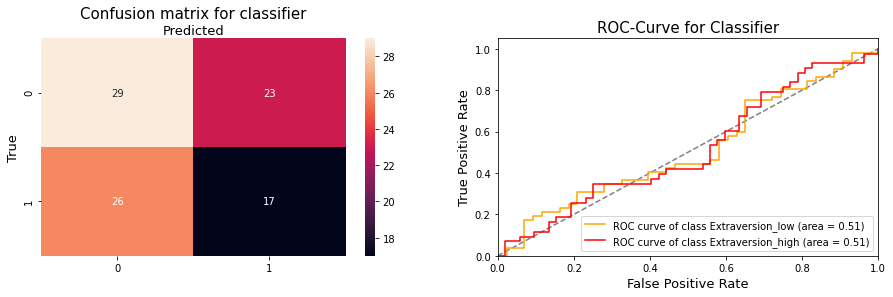

Cross validation accuracy:
	 0.4842105263157895

Cross validation classification report

              precision    recall  f1-score   support

           0       0.53      0.56      0.54        52
           1       0.42      0.40      0.41        43

    accuracy                           0.48        95
   macro avg       0.48      0.48      0.48        95
weighted avg       0.48      0.48      0.48        95



In [ ]:
crossvalidationPlots(clf_lr, x_train, y_train, 'Extraversion_low', 'Extraversion_high', 42)

In [ ]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    f, ax = plt.subplots(figsize=(15,15))
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

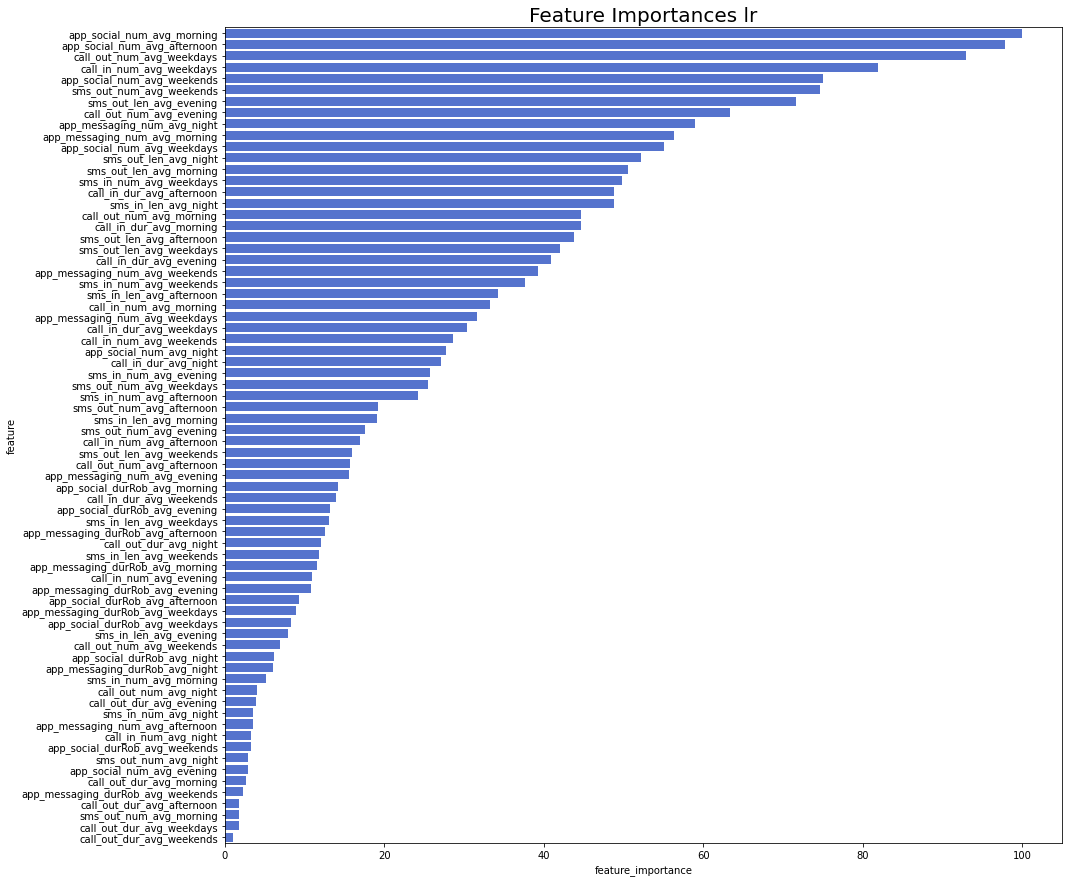

In [ ]:
feature_importances = abs(clf_lr.coef_[0])
feature_importances = 100.0 * (feature_importances / feature_importances.max())
indices = np.argsort(feature_importances)[::-1]
var_imp_plot(imp_df(x_train.columns[indices], feature_importances[indices]), 'Feature Importances lr')

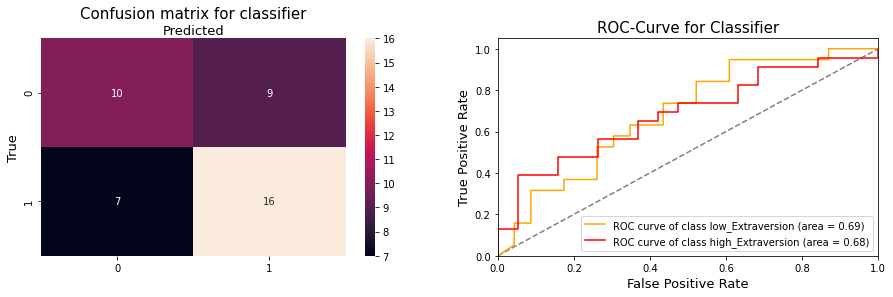

Cross validation accuracy:
	 0.6190476190476191

Cross validation classification report

              precision    recall  f1-score   support

           0       0.59      0.53      0.56        19
           1       0.64      0.70      0.67        23

    accuracy                           0.62        42
   macro avg       0.61      0.61      0.61        42
weighted avg       0.62      0.62      0.62        42



In [ ]:
crossvalidationPlots(clf_lr, x_test, y_test, 'low_Extraversion', 'high_Extraversion', 42)